<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Gouped_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW STACKED AND GROUPED BAR GRAPHS

#!pip install statsmodels==0.13.5

In [ ]:
# PARAMETERS
csv_file = '/content/sm_bca_colin_24_mMg.csv' #'/content/sm_chl_24.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv
csv_file_ltrs = '/content/sm_bca_240826_tac.csv' #'/content/sm_chl_24_colab.csv'
csv = '/content/gr_bca_0816_mda_gox.csv'
csv1 = '/content/ca_bca_all_0920.csv'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv, delimiter='\t', decimal='.')

In [ ]:
df = df.dropna()
methods = df.columns.values
methods = np.delete(methods, 0)

In [ ]:
label_order1 = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
               'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19',
                'n20', 'n21', 'n22', 'xA', 'xB', 'xC', 'xD', 'xF', 'xG']

label_order = [
    'Lp', 'Lp N',
    'Ac', 'Ac N', 'Ad', 'Ad N',
    'Fa', 'Fa N', 'Fp', 'Fp N', 'Fr', 'Fr N', 'Bi', 'Bi N',
]

df = df.sort_values(by='groups', key=lambda x: x.map(lambda x: label_order.index(x)))

In [ ]:
data = pd.DataFrame({'method':[], 'mean':[], 'error':[]})
# Групиране на данните по варианти и изчисляване на средната стойност и стандартната грешка
def make_mean_err(column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    stat_result = df.groupby(['groups'], as_index=False, sort=False).agg({column_name:['mean','std']})
    menMeans = stat_result[column_name]['mean']
    menStd = stat_result[column_name]['std']
    stat_result_df = pd.DataFrame({'mean': menMeans, 'error': menStd})
    return stat_result_df

for method in methods:
    result = make_mean_err(method)
    # Create a temporary DataFrame with the method name
    temp_df = pd.DataFrame({'method': [method] * len(result), 'mean': result['mean'], 'error': result['error']})
    # Concatenate the temporary DataFrame with the main data DataFrame
    data = pd.concat([data, temp_df], ignore_index=True)
print (data)

   method      mean     error
0     MDA  3.775575  0.217803
1     MDA  8.503211  0.528007
2     MDA  1.474761  0.079201
3     MDA  4.428950  0.033000
4     MDA  2.226142  0.204603
5     MDA  6.393743  1.148415
6     MDA  2.025463  0.145202
7     MDA  6.463747  0.310204
8     MDA  2.576165  0.514807
9     MDA  6.029719  0.910812
10    MDA  7.387806  1.551020
11    MDA  4.662298  0.983413
12    MDA  3.887582  0.217803
13    MDA  4.890980  0.118802
14    GOX  0.606557  0.156491
15    GOX  1.786885  0.121715
16    GOX  2.151639  0.834618
17    GOX  1.684426  0.220246
18    GOX  1.827869  0.249226
19    GOX  2.340164  0.104327
20    GOX  0.950820  0.017388
21    GOX  0.012295  0.428901
22    GOX  0.520492  0.057960
23    GOX  0.467213  0.214450
24    GOX  1.545082  0.162287
25    GOX  1.881148  0.115919
26    GOX  1.459016  0.318778
27    GOX  1.004098  0.289798


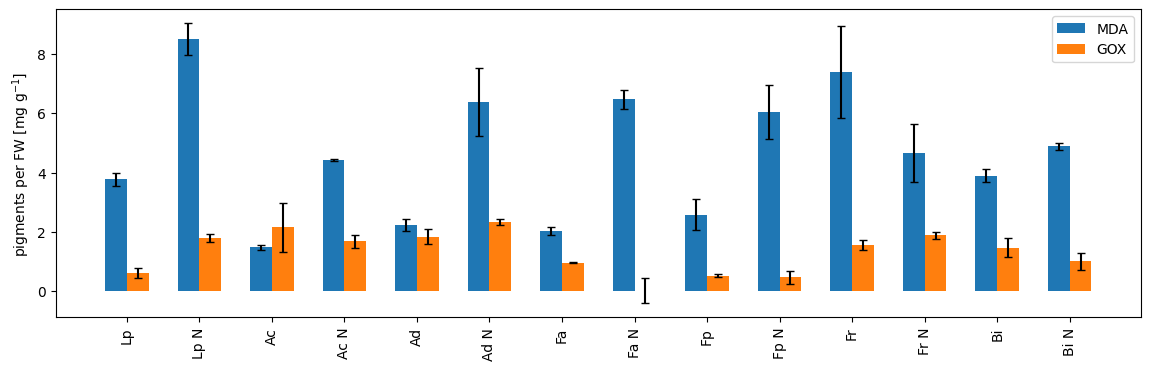

In [ ]:
import matplotlib.pyplot as plt

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 4))

methods = data['method'].unique()
bar_width = 0.3

index = np.arange(len(data) // len(methods))
# Extract unique group names from the original DataFrame
group_names = df['groups'].unique()

for i, method in enumerate(methods):
  temp_df = data[data['method'] == method]
  ax.bar(index + i * bar_width, temp_df['mean'], bar_width, yerr=temp_df['error'], capsize=3, label=method)

# smenqne na tickchetata
#plt.yticks([0, 100, 200, 300], ['0', '1', '2', '3'])

ax.set_ylabel('pigments per FW [mg g$^{-1}$]')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
# Set x-axis labels to group names
ax.set_xticklabels(group_names, rotation=90)
ax.legend()

plt.show()
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

value = 'PM'
variant = 'groups'

# Convert 'value' column to numeric, handling potential errors
df[value] = pd.to_numeric(df[value], errors='coerce')

# Perform ANOVA (replace 'dependent_variable' and 'group_variable' with actual column names)
from scipy import stats
result = stats.f_oneway(*[df[value][df[variant] == s] for s in df[variant].unique()])
print(result)
# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(df[value], df[variant], alpha=0.05)

# Print the results
print(tukey_result)

KeyError: 'PM'

In [ ]:
import statsmodels.stats.multicomp as mc

sorting_labels = variant
data = df

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data[value].astype('float'), data[variant])
result = model.tukeyhsd()
print(result.groupsunique)
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

In [ ]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

for i in ind:
  print(all_groups[i])

In [ ]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


In [ ]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
#new_v = new_df_ltr[0]
#new_df_ltr[0] = new_df_ltr[4]
#new_df_ltr[4] = new_v

new_ltr = []
'''
group_order = [ 'La ed21.05', 'La sm21.05', 'Hv ed21.05', 'Hv sm21.05',
               'La ed28.05', 'La sm28.05', 'Hv ed28.05', 'Hv sm28.05',
               'La ed14.06', 'La sm14.06', 'Hv ed14.06', 'Hv sm14.06']
'''
group_order = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
               'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19',
                'n20', 'n21', 'n22', 'xA', 'xB', 'xC', 'xD', 'xF', 'xG']

# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])

#print(np.array(df_ltr.sum(axis=1)), new_ltr)
print (new_ltr)


chl a

['La ed 28.05', 5, 'de']
['La sm 28.05', 7, 'de']
['Hv ed 28.05', 1, 'ab']
['Hv sm 28.05', 3, 'b']
['La ed 14.06', 4, 'd']
['La sm 14.06', 6, 'e'] # ne e 'e', 'b' , a 'ab' !!!
['Hv ed 14.06', 0, 'a']
['Hv sm 14.06', 2, 'c']
['de', 'de', 'ab', 'b', 'd', 'e', 'a', 'c']

['ab', 'ab', 'cd', 'c', 'a', 'b', 'd', 'e']

chl b

['La ed 28.05', 5, 'e']
['La sm 28.05', 7, 'de']
['Hv ed 28.05', 1, 'b']
['Hv sm 28.05', 3, 'b']
['La ed 14.06', 4, 'd']
['La sm 14.06', 6, 'f']
['Hv ed 14.06', 0, 'a']
['Hv sm 14.06', 2, 'c']
['e', 'de', 'b', 'b', 'd', 'f', 'a', 'c']

['a', 'ab', 'c', 'c', 'b', 'd', 'e', 'f']

car

['La ed 28.05', 5, 'd']
['La sm 28.05', 7, 'd']
['Hv ed 28.05', 1, 'ab']
['Hv sm 28.05', 3, 'a']
['La ed 14.06', 4, 'bd']
['La sm 14.06', 6, 'bd']
['Hv ed 14.06', 0, 'a']
['Hv sm 14.06', 2, 'c']
['d', 'd', 'ab', 'a', 'bd', 'bd', 'a', 'c']

['a', 'a', 'bc', 'c', 'ab', 'ab', 'c', 'd']


PM
['La ed21.05', 7, 'ac']
['La sm21.05', 10, 'c']
['Hv ed21.05', 1, 'ab']
['Hv sm21.05', 4, 'ab']
['La ed28.05', 8, 'b']
['La sm28.05', 11, 'ab']
['Hv ed28.05', 2, 'ac']
['Hv sm28.05', 5, 'ab']
['La ed14.06', 6, 'ac']
['La sm14.06', 9, 'ac']
['Hv ed14.06', 0, 'ab']
['Hv sm14.06', 3, 'ac']
['ac', 'c', 'ab', 'ab', 'b', 'ab', 'ac', 'ab', 'ac', 'ac', 'ab', 'ac']

['ab', 'b', 'ac', 'ac', 'c', 'ac', 'ab', 'ac', 'ab', 'ab', 'ac', 'ab']

FRAP
['La ed21.05', 7, 'be']
['La sm21.05', 10, 'be']
['Hv ed21.05', 1, 'c']
['Hv sm21.05', 4, 'c']
['La ed28.05', 8, 'e']
['La sm28.05', 11, 'e']
['Hv ed28.05', 2, 'd']
['Hv sm28.05', 5, 'ac']
['La ed14.06', 6, 'e']
['La sm14.06', 9, 'e']
['Hv ed14.06', 0, 'ab']
['Hv sm14.06', 3, 'c']
['be', 'be', 'c', 'c', 'e', 'e', 'd', 'ac', 'e', 'e', 'ab', 'c']

['ab', 'ab', 'c', 'c', 'a', 'a', 'd', 'ce', 'a', 'a', 'be', 'c']


Folin
['La ed21.05', 7, 'f'] a
['La sm21.05', 10, 'df'] ab
['Hv ed21.05', 1, 'bc'] cd
['Hv sm21.05', 4, 'be'] ce
['La ed28.05', 8, 'cd'] db
['La sm28.05', 11, 'd'] b
['Hv ed28.05', 2, 'd'] b
['Hv sm28.05', 5, 'bc'] cd
['La ed14.06', 6, 'be'] ce
['La sm14.06', 9, 'bc'] cd
['Hv ed14.06', 0, 'a'] f
['Hv sm14.06', 3, 'ae'] fe
['f', 'df', 'bc', 'be', 'cd', 'd', 'd', 'bc', 'be', 'bc', 'a', 'ae']

['a', 'ab', 'cd', 'de', 'cb', 'b', 'b', 'cd', 'de', 'cd', 'f', 'ef']

['d', 'd', 'b', 'bc', 'bc', 'b', 'b', 'ac', 'bc', 'b', 'a', 'ac']

['a', 'a', 'b', 'bc', 'bc', 'b', 'b', 'dc', 'bc', 'b', 'd', 'dc']






In [ ]:
# chl a La sm 14.06 ne e 'b', a 'ab' !!!

#ltr_pm = ['ab', 'ab', 'cd', 'c', 'a', 'b', 'd', 'e']
ltr_pm = ['ab', 'b', 'ac', 'ac', 'c', 'ac', 'ab', 'ac', 'ab', 'ab', 'ac', 'ab']
#ltr_frap = ['a', 'a', 'b', 'b', 'c', 'c', 'd', 'e']
ltr_frap = ['ab', 'ab', 'c', 'c', 'a', 'a', 'd', 'ce', 'a', 'a', 'be', 'c']
#ltr_folin = ['a', 'a', 'bc', 'c', 'ab', 'ab', 'c', 'd']
ltr_folin = ['a', 'a', 'b', 'bc', 'bc', 'b', 'b', 'dc', 'bc', 'b', 'd', 'dc']
new_ltr = []
#for i in range(len(ltr_pm)):
new_ltr.append(ltr_pm)
new_ltr.append(ltr_frap)
new_ltr.append(ltr_folin)
print(new_ltr)


In [ ]:
import itertools as it
month = pd.unique(df_data['month'].values).tolist()
method = pd.unique(df_data['method'].values).tolist()
combinations = np.array(np.meshgrid(month, method)).T.reshape(-1, 2)

In [ ]:
def make_mean_err(value):
  sorting_labels = 'groups'

  # Convert the column to numeric, handling non-numeric values
  data[value] = pd.to_numeric(data[value], errors='coerce')  # 'coerce' converts invalid values to NaN

  stat_result = data.groupby([sorting_labels], as_index=False, sort=False).agg({value:['mean','std']})

  menMeans = stat_result[value]['mean']
  menStd = stat_result[value]['std']

  labels = pd.unique(data[sorting_labels]).astype(str)
  #labels = pd.unique(data[variant]).astype(str)

  stat_result_df = pd.DataFrame({
      'mean': menMeans,
      'error': menStd
  })

  ind  = np.arange(len(stat_result_df['error']))    # the x locations for the groups
  width= 0.7

  return stat_result_df

In [ ]:
for m in method:
  result = make_mean_err(m)
  if method[0] == 'PM':
    df_data[df_data['method'] == m]['mean'] = result['mean']
    df_data[df_data['method'] == m]['error'] = result['error']
  else:
    for i in range(8):
        for key in ['mean', 'error']:
            df_data.loc[i*3 + method.index(m), key] = result.loc[i, key]

In [ ]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10, n_ltr=[], method='PM', ii=0, data_index=0):
  rotation = 90
  variant = 'groups'
  value = method
  data[value] = pd.to_numeric(df[value], errors='coerce')
  grp = data[variant][int(data_index)*2]

  if follow_bars:
    y_pos = 5 - (5 - data[data[variant] == grp][value].max()) * 0.9825 + 0.3
  else:
    y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
  ax.text(ii - 1, y_pos, n_ltr,
          rotation=rotation, fontsize=fsize, verticalalignment='top', horizontalalignment='center')
  #ii += 0.2

In [ ]:
import matplotlib.pyplot as plt
# create data
x = np.arange(0, 10, 2.9) # distribution of bars on graph
xx = [-1, -1] # offset of bars
fig, ax = plt.subplots(layout='constrained', figsize=(14, 4))

h = ['', '//', 'XX']
width = 0.2
bar_kwargs = {'width':width,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
color_method = { 0: "dodgerblue", 1: "tomato", 2: "gold"}
y_height=4.9
ii = 0

for key, value in enumerate(method):
  for i, j in enumerate(month):
    #print(key, i)
    y_data = df_data[df_data['month'] == str(j)][df_data['method'] == str(value)]['mean'].values
    y_err = df_data[df_data['month'] == str(j)][df_data['method'] == str(value)]['error'].values
    ax.bar(x+xx[0], y_data, yerr=y_err,
           hatch=h[i], color=color_method[key], **bar_kwargs,  error_kw=err_kwargs)
    xx[0] = xx[0] + width
  xx[0] = xx[0] + width

plt.rcParams['hatch.linewidth'] = 1

for i in range(4):
  for key, value in enumerate(method):
    for k in range(3):
      #print (key, (k * 4) + i)
      draw_letters(y_height, True, 1, fsize=12,
                   n_ltr=new_ltr[key][(k * 4) + i], method=value,
                   ii=ii, data_index = (k * 4) + i)
      ii += width
    ii += width
  ii += 0.5

label = pd.unique(df_data['species'].values)
plt.rc('font', size=12)
#plt.xticks(x, label, fontsize=12)
plt.yticks(np.arange(0, 7, 1.75), ['0', '25', '50', '75'], fontsize=12)

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)

# Hide X and Y axes tick marks
ax.set_xticks([])

# label the classes:
sec = ax.secondary_xaxis(location=0)

#labels_secondary = ['chl a  chl b  car', 'chl a  chl b  car',
#                    'chl a  chl b  car', 'chl a  chl b  car']
labels_secondary = ['May 21   May 28   Jun 14', 'May 21   May 28   Jun 14',
  'May 21   May 28   Jun 14', 'May 21   May 28   Jun 14']
sec.set_xticks(x, labels=labels_secondary)
sec.tick_params('x', length=0)

# lines between the classes:
sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(x, labels=['\n $\mathit{L. albus}$ mono', '\n $\mathit{L. albus}$ mixed',
                            '\n $\mathit{H. vulgare}$ mono', '\n $\mathit{H. vulgare}$ mixed'])
sec2.tick_params('x', length=0)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

ax.tick_params(axis='y', which='minor', bottom=True)
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_yticks([0, 10, 20, 30], minor=True)

plt.ylabel('[mM / mg] AAE, GAE')
#plt.legend(combinations.tolist(), loc='upper left')
legend = [r'chl ${\mathit{a}}$', 'chl ${\mathit{b}}$', 'carotenoids']
legend = ['May 21', 'May 28', 'Jun 14'] #['PM', 'FRAP', 'Folin']
ax.legend(legend, loc='upper left', ncols=3)
ax.set_ylim([0, 5])

fig.show()
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
# create data
x = np.arange(5)
'''
y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
y3 = df[df['month'] == 'October'][df['method'] == 'PM']['mean'].values
y4 = df[df['month'] == 'October'][df['method'] == 'FRAP']['mean'].values
y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
y2err = df[df['month'] == 'July'][df['method'] == 'FRAP']['error'].values
y3err = df[df['month'] == 'October'][df['method'] == 'PM']['error'].values
y4err = df[df['month'] == 'October'][df['method'] == 'FRAP']['error'].values
'''
# water extracts
y1w = [-2.69132653061225, -3.59360505565864, -1.7310702690167, -5.56847170686456, -8.37676832096475]
y1werr = [0.010870825602975, 0.268147031539887, 0.0362360853432275, 0.134073515769938, 0.3985969387755]

plt.figure(figsize=(12, 5))
bar_kwargs = {'width':0.2,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
p1 = plt.bar(x-0.3, y1, color='pink', yerr=y1err, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(x-0.1, y2, color='red', yerr=y2err, **bar_kwargs,  error_kw=err_kwargs)
p3 = plt.bar(x+0.1, y3, color='lightblue', yerr=y3err, **bar_kwargs,  error_kw=err_kwargs)
p4 = plt.bar(x+0.3, y4, color='blue', yerr=y4err, **bar_kwargs,  error_kw=err_kwargs)

p1w = plt.bar(x-0.3, y1w, bottom=y1, color='violet', yerr=y1werr, **bar_kwargs,  error_kw=err_kwargs)

label = pd.unique(df['species'].values)
plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)
import re
plt.ylabel('[mM / mg] AAE')
plt.legend((p1, p2, p3, p4, p1w), ncols=1, labels=['Jul, PM (etOH only)', 'Jul, FRAP (H$_2$O & etOH)',
                                          'Oct, PM (H$_2$O & etOH)', 'Oct, FRAP (H$_2$O & etOH)', 'Jul, PM (H$_2$O only)'])
# [re.sub(r'[\[\]\']', '', str(i)) for i in combinations.tolist()], loc='upper left') # automatic labeling
plt.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [ ]:
'''
bar_kwargs = {'width':width,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
fig, ax = plt.subplots()

p1 = plt.bar(ind, menMeans1, color='blue',
             yerr=menStd1, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(ind, menMeans2, color='orange',
             bottom=menMeans1, yerr=menStd2, **bar_kwargs,  error_kw=err_kwargs)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', rotation=90)
plt.ylim(ymax=y_height)
y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=12)
plt.legend((p1[0], p2[0]), ('ethanol', 'water'))

fig.suptitle('')
plt.show()
'''

In [ ]:
import matplotlib.pyplot as plt
# create data
label = pd.unique(df['species'].values)
x = np.arange(len(label))
plt.figure(figsize=(12, len(label)))
bar_kwargs = {'width':0.2,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
params = ['A_c', 'E']
y1, y1err, p = [], [], []

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# plot data in grouped manner of bar type
for i in range(len(params)):
    stat_result = df.groupby(['groups'], as_index=False).agg({params[i]:['mean','std']})
    y1.append(stat_result[params[i]]['mean'].values)
    y1err.append(stat_result[params[i]]['std'].values)
    #p.append(plt.bar(x-xx, y1[i], yerr=y1err[i], **bar_kwargs,  error_kw=err_kwargs))

plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)
plt.ylabel('[mg / mL] AAE, GE')

p1 = ax1.bar(x-0.1, y1[0], yerr=y1err[0], color='red', **bar_kwargs,  error_kw=err_kwargs)
p2 = ax2.bar(x+0.1, y1[1], yerr=y1err[1], color='blue', **bar_kwargs,  error_kw=err_kwargs)
ax1.set_ylim(ymax=45)
ax2.set_ylim(ymax=7)
ax1.set_yticks(np.round(np.arange(0, 45, 10), 1))
ax2.set_yticks(np.round(np.arange(0, 7, 1), 1))
#ax1.set_xlabel('X data')
ax1.set_ylabel('A$_{n}$ [$\mu mol m^{-2} s^{-1}$]', color='black')
ax2.set_ylabel('E [$mmol m^{-2} s^{-1}$]', color='black')
fig.show()

fig.legend((p1,p2), ['$A_{n}$','E'], loc='upper left')
fig.savefig('anovatest.jpg',dpi=300,bbox_inches='tight')

In [ ]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * 0.05
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i+bplt, y_pos, new_ltr[i],
              rotation=90, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [ ]:
import matplotlib.pyplot as plt
# create data
x = np.arange(0, 10, 2.9)
xx = [-1, -0.8]
fig, ax = plt.subplots(layout='constrained', figsize=(8, 4))

bar_kwargs = {'width':0.8,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
color_method = { 0: "dodgerblue", 1: "tomato", 2: "gold"}

a3 = df['mean'].values
a3err = df['error'].values
ax.bar(x, a3, yerr=a3err, color=color_method[0], **bar_kwargs,  error_kw=err_kwargs)

label = pd.unique(df['species'].values)
plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)

draw_letters(y_height, False, 1, fsize=18)


# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)

# Hide X and Y axes tick marks
ax.set_xticks([])

# lines between the classes:
sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(x, labels=['\n $\mathit{L. albus}$ mono', '\n $\mathit{L. albus}$ mixed',
                            '\n $\mathit{H. vulgare}$ mono', '\n $\mathit{H. vulgare}$ mixed'])
sec2.tick_params('x', length=0)

plt.ylabel('mM Gl g$^{-1}$ FW h$^{-1}$')
#plt.legend(combinations.tolist(), loc='upper left')
#legend = [r'chl ${\mathit{a}}$', 'chl ${\mathit{b}}$', 'carotenoids']
#legend = ['PM', 'FRAP', 'Folin']
#ax.legend(legend, loc='upper left', ncols=3)
fig.show()
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the unique dates
date_labels = df['month'].unique()

# Create a figure and subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Define colors for each species
species_colors = {'L. albus mono': 'red', 'L. albus mixed': 'green', 'H. vulgare mono': 'blue', 'H. vulgare mixed': 'purple'}

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the dates and create a subplot for each
for i, date in enumerate(date_labels):
    # Filter the dataframe for the current date
    df_date = df[df['month'] == date]

    # Get the NPQ columns
    npq_columns = [col for col in df_date.columns if 'NPQ_' in col]

    # Group the data by species
    for species in species_colors.keys():
        df_species = df_date[df_date['species'] == species]
        if not df_species.empty:
            npq_data = df_species[npq_columns].values.flatten()
            x_values = range(len(npq_data))
            axes[i].plot(x_values, npq_data, label=species, color=species_colors[species])
            axes[i].scatter(x_values, npq_data, color=species_colors[species])

    # Set the title for the subplot
    axes[i].set_title(date)

# Set common x and y labels
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'NPQ', va='center', rotation='vertical')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()